In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('Walmart_Sales.csv')
data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.isna().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data.describe().round(2)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.74,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [6]:
# Convert the 'Date' column to datetime objects, specifying the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


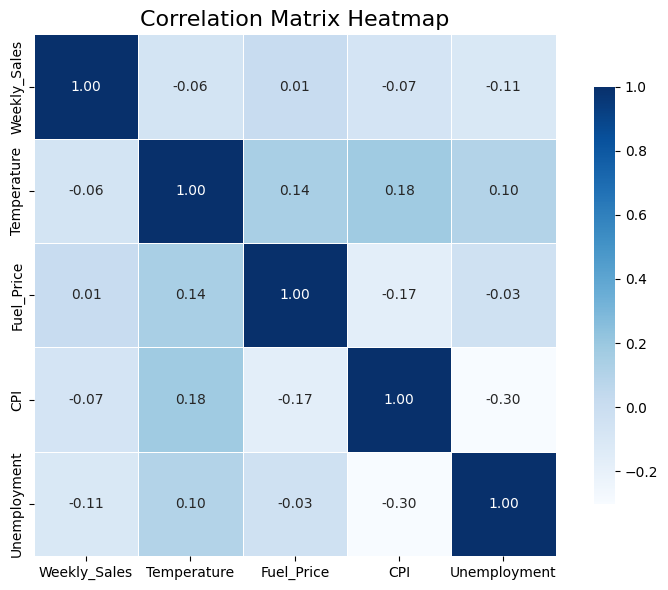

In [7]:
correlation_data = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(8, 6))
# Change cmap to a valid colormap name like 'Blues' or others mentioned below
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.tight_layout()
plt.show()

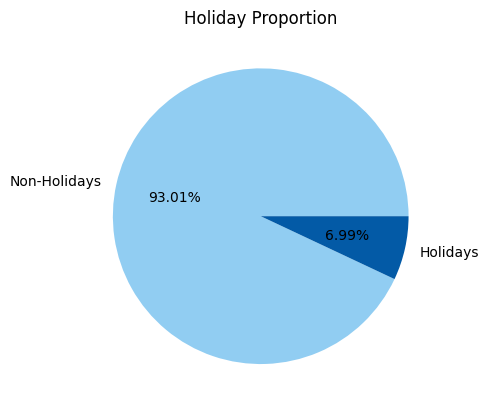

In [8]:
# Calculate the holiday counts
holiday_counts = data['Holiday_Flag'].value_counts()

#pie chart
labels = ['Non-Holidays', 'Holidays']
colors = ['#91CDF2', '#035AA6']
plt.pie(holiday_counts.values, labels=labels, autopct='%1.2f%%', colors=colors)
plt.title('Holiday Proportion')

plt.show()

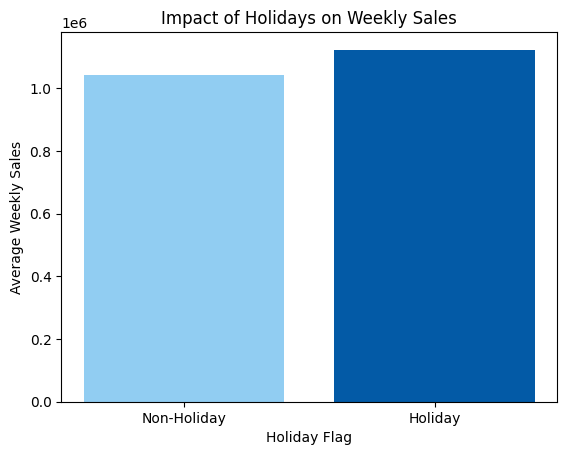

In [9]:
# Group by Holiday_Flag and calculate average Weekly_Sales for each group
holiday_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()
# Plotting impact of holidays on weekly sales
plt.bar(['Non-Holiday', 'Holiday'], holiday_sales, color=[ '#91CDF2','#035AA6'])
plt.title('Impact of Holidays on Weekly Sales')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.show()

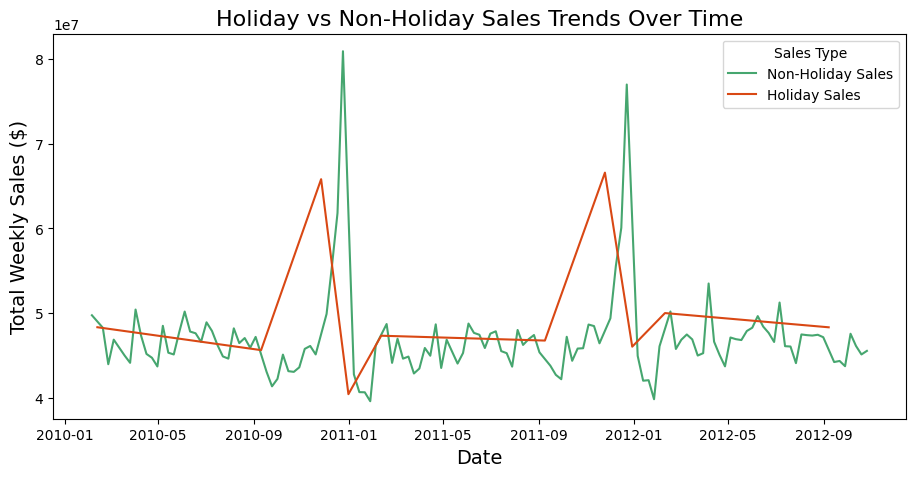

In [10]:
# Group by date and Holiday_Flag, and calculate total weekly sales
sales_trend = data.groupby(['Date', 'Holiday_Flag'])['Weekly_Sales'].sum().reset_index()

sales_trend_pivot = sales_trend.pivot(index='Date', columns='Holiday_Flag', values='Weekly_Sales')
sales_trend_pivot.columns = ['Non-Holiday Sales', 'Holiday Sales']

plt.figure(figsize=(11, 5))
sns.lineplot(data=sales_trend_pivot['Non-Holiday Sales'], label='Non-Holiday Sales', color='#46A66F')
sns.lineplot(data=sales_trend_pivot['Holiday Sales'], label='Holiday Sales', color='#D94814')

plt.title('Holiday vs Non-Holiday Sales Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Weekly Sales ($)', fontsize=14)
plt.legend(title='Sales Type')

plt.show()

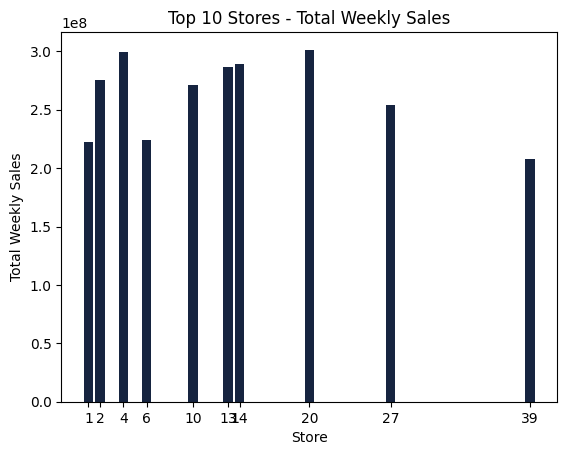

In [11]:
# Group by Store and calculate total Weekly Sales for each store
store_sales = data.groupby('Store')['Weekly_Sales'].sum() # Changed df to data

# Select top 5 stores based on total sales
top_10_stores = store_sales.nlargest(10)

# Plotting Store Comparison for top 10 stores
plt.bar(top_10_stores.index, top_10_stores.values, color='#162440')
plt.title('Top 10 Stores - Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(top_10_stores.index)
plt.show()

In [12]:
#define Season column
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

data['Season'] = data['Date'].apply(get_season)


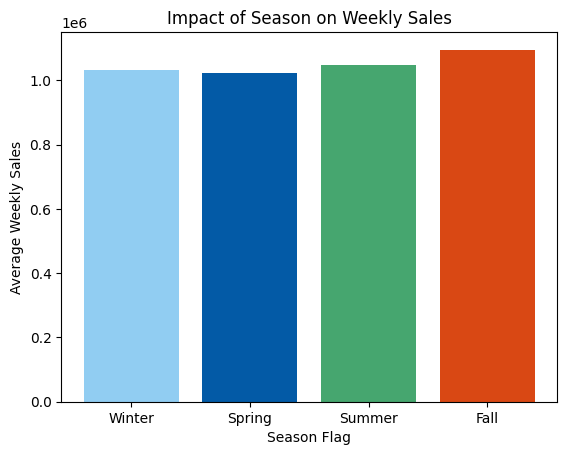

In [13]:
# Group by Season Flag') and calculate average Weekly_Sales for each group
Season_sales = data.groupby('Season')['Weekly_Sales'].mean()
# Plotting impact of Seasons on weekly sales
plt.bar(['Winter','Spring','Summer','Fall'], Season_sales, color=[ '#91CDF2','#035AA6','#46A66F','#D94814'])
plt.title('Impact of Season on Weekly Sales')
plt.xlabel('Season Flag')
plt.ylabel('Average Weekly Sales')
plt.show()

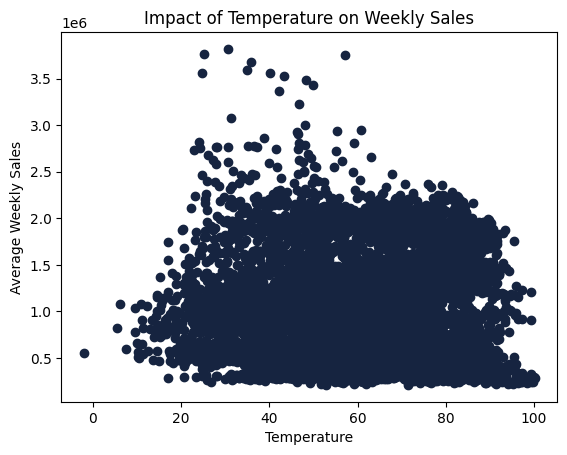

In [14]:
plt.scatter(data['Temperature'], data['Weekly_Sales'],color='#162440')
plt.title('Impact of Temperature on Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Average Weekly Sales')
plt.show()

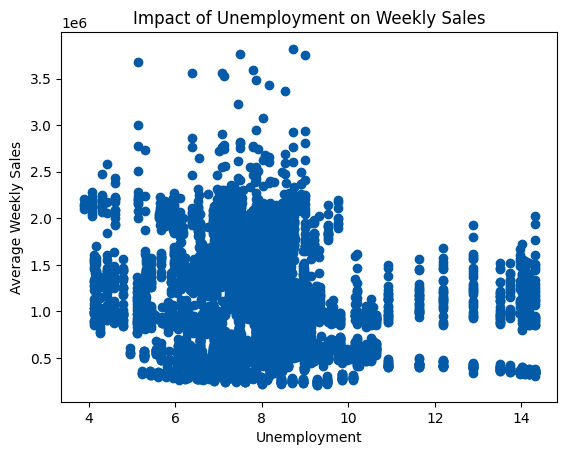

In [15]:
plt.scatter(data['Unemployment'], data['Weekly_Sales'],color='#035AA6')
plt.title('Impact of Unemployment on Weekly Sales')
plt.xlabel('Unemployment')
plt.ylabel('Average Weekly Sales')
plt.show()

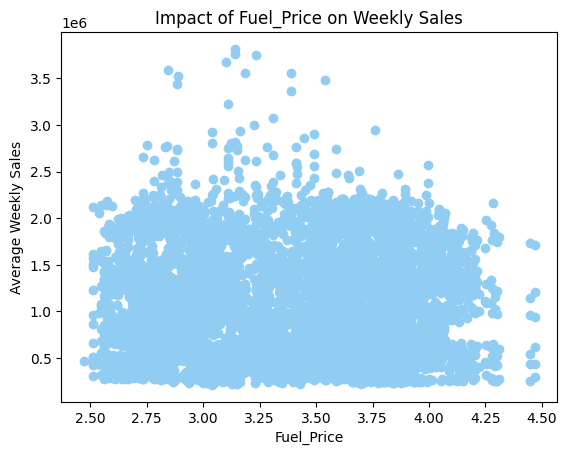

In [16]:

plt.scatter(data['Fuel_Price'], data['Weekly_Sales'],color='#91CDF2')
plt.title('Impact of Fuel_Price on Weekly Sales')
plt.xlabel('Fuel_Price')
plt.ylabel('Average Weekly Sales')
plt.show()

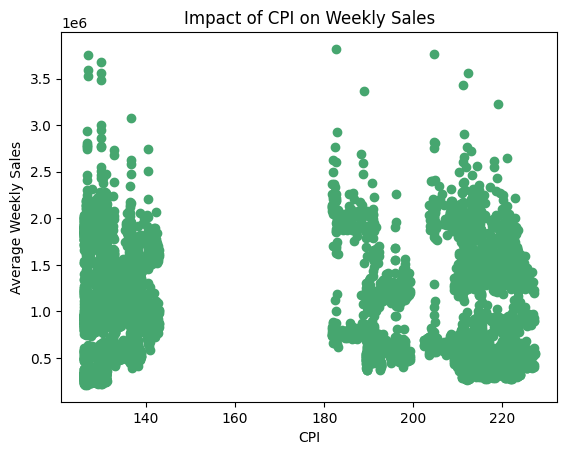

In [17]:
plt.scatter(data['CPI'], data['Weekly_Sales'],color='#46A66F')
plt.title('Impact of CPI on Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Average Weekly Sales')
plt.show()

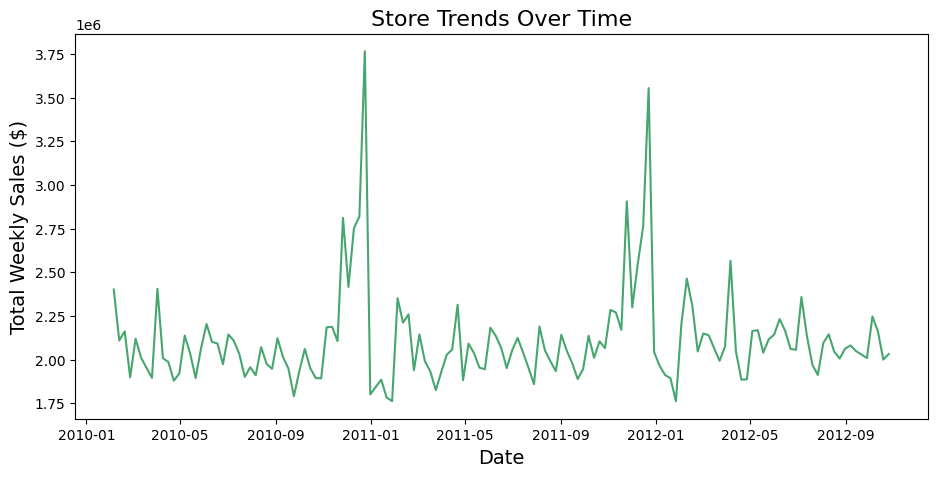

In [18]:
# Group by date and store, and calculate total weekly sales
sales_trend = data.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()

sales_trend_pivot = sales_trend.pivot(index='Date', columns='Store', values='Weekly_Sales')

plt.figure(figsize=(11, 5))
# Select the column representing the top store's sales to plot
top_store_column = store_sales.idxmax()  # Get the Store with maximum sales
sns.lineplot(data=sales_trend_pivot[top_store_column], color='#46A66F') #Plot the sales trend for the top store

plt.title('Store Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Weekly Sales ($)', fontsize=14)

plt.show()